# **Covid 19: elders situation**

In [0]:
from helpers import *

In [0]:
%matplotlib inline

## **Loading the Microsoft Bing covid 19 dataset**

In [0]:
round_precision=2

# Loading the French institutions datasets
data_gouv_France_ephad, data_gouv_France_all, data_by_age = get_covid_19_data_france(min_cases=1000)

# Ministère de la Santé data on 04/30/2020 (from the dataset retrieved below)
date_France = '2020-04-30'
add_map_France = {
    'France (ehpad)':round(data_gouv_France_ephad.loc[date_France, 'death rate (ehpad)'], round_precision),
    'France (hospital)':round(data_gouv_France_ephad.loc[date_France, 'death rate (hospital)'], round_precision)
}

# Loading the MS Bing covid 19 latest data
date_ = '04/30/2020'
bing_data_latest_by_country = get_covid_19_data(date_, min_cases=10000, ref_country='South Korea', add_map=add_map_France, round_precision=round_precision)

# Loading the MS Bing covid 19 time series
bing_data_by_country = get_covid_19_data()

## **Showing the deaths overs confirmed cases share per country**

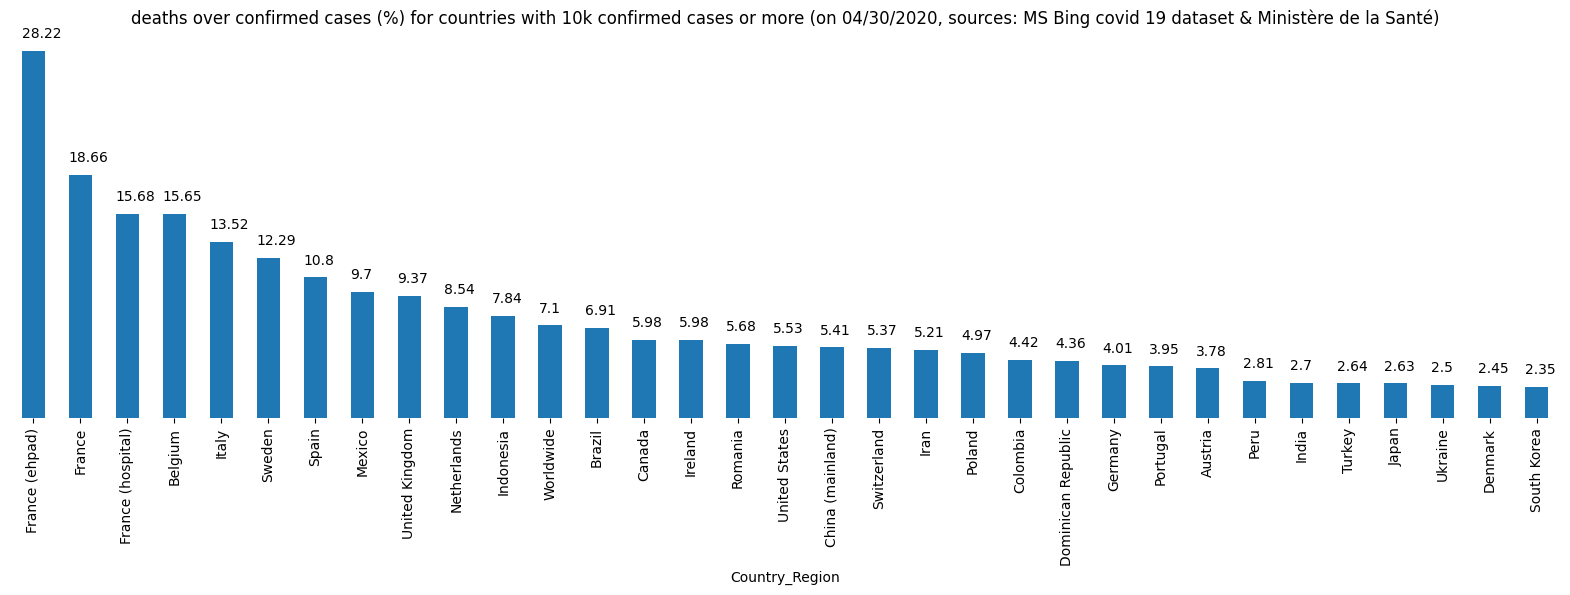

In [0]:
# Plotting the data
bing_data_latest_by_country_ = bing_data_latest_by_country[['death rate']].copy()
plot_death_rate(bing_data_latest_by_country_, date_, figsize=(20,5))

According to this graph, France is the worst country to live in if infected by covid 19. Of course, we have to be careful with this, but this situation raises questions anyway.

## **Showing the deaths overs confirmed cases share per country over time**

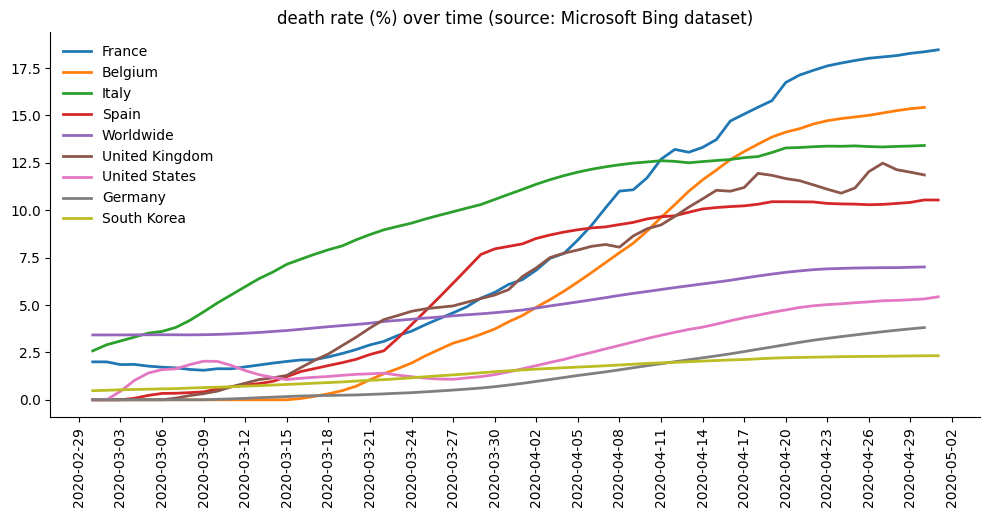

In [0]:
country_set = ['France', 'Belgium', 'Italy', 'Spain', 'Worldwide', 'United Kingdom', 'United States', 'Germany', 'South Korea']
plot_covid_19_time_series(bing_data_by_country, country_set, rolling_param=7, unit="%", figsize=(12, 5), plot_date_interval=3)

Here we can see that the spectacular rise of the french covid 19 death rate started around March, 18th and that it slowed down after April, 7th.

## **French institutions dataset**

### **Plotting deaths over confirmed cases over time**

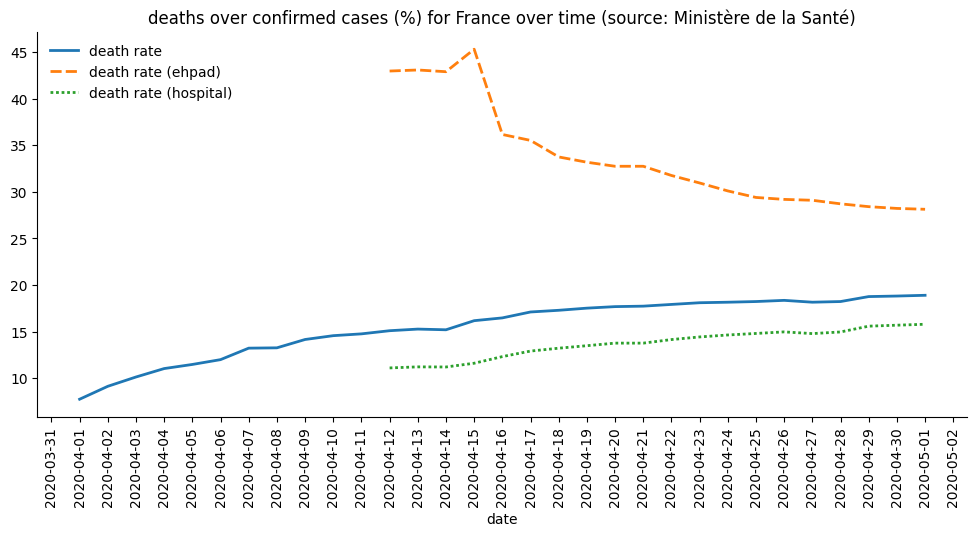

In [0]:
title = 'deaths over confirmed cases (%) for France over time (source: Ministère de la Santé)'
_data = data_gouv_France_ephad[['death rate', 'death rate (ehpad)', 'death rate (hospital)']]
plotting_figure_from_df(_data, title=title, figsize=(12,5), legend='upper left')

It could seem obvious that the covid 19 deaths number among elders would be greater than for younger people. However, we can ask ourselves the question of whether this is normal at this level or not.

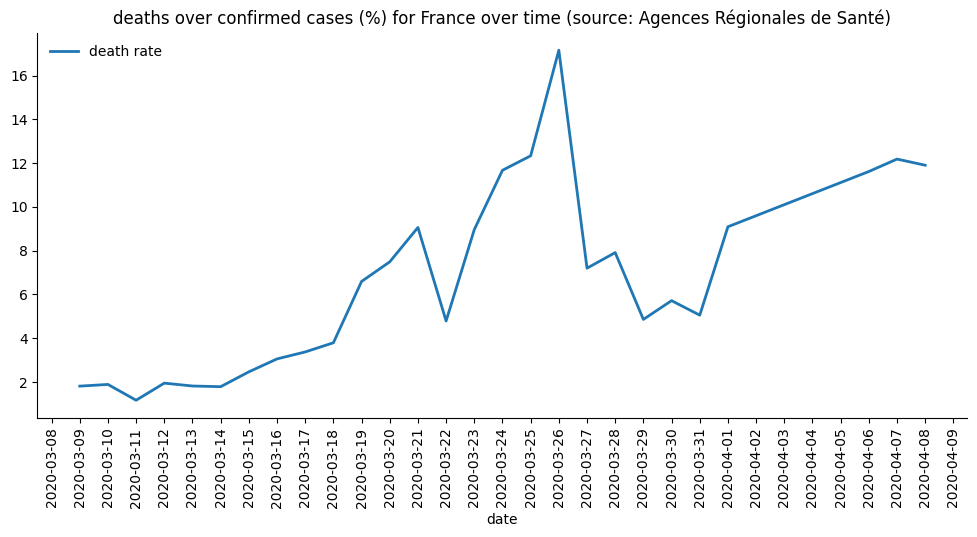

In [0]:
title = 'deaths over confirmed cases (%) for France over time (source: Agences Régionales de Santé)'
_data = data_gouv_France_all[['death rate']]
plotting_figure_from_df(_data, title=title, figsize=(12,5), legend='upper left')

Something strange seems to have happened between March, 18th and March, 27th.

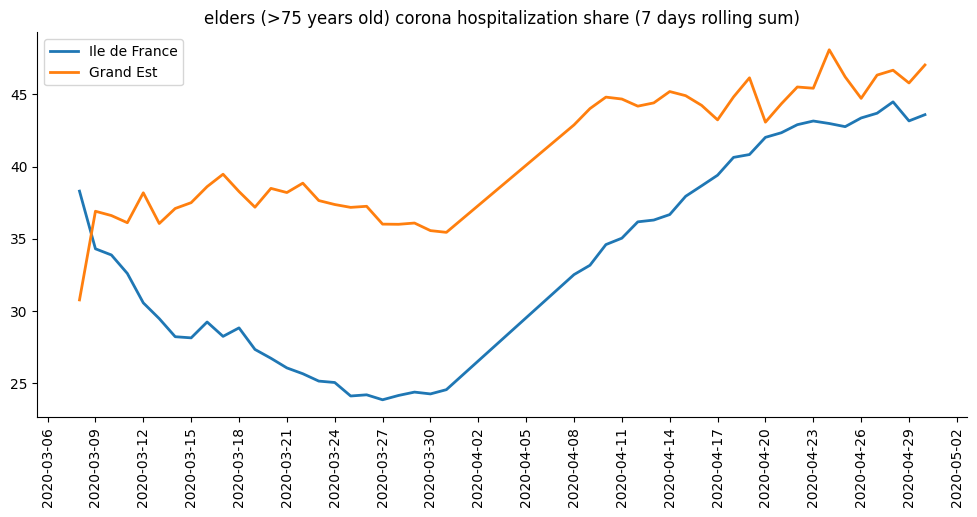

In [0]:
dep_map_idf_ge = {
    'Ile de France':['75', '77', '78', '91', '92', '93', '94', '95'],
    'Grand Est':['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']
}
plot_hosp_share_France(data_by_age, dep_map_idf_ge, figsize = (12, 5), plot_date_interval=3)

The elders situation in Ile de France was terrible from the beginning of March and get even worst from March, 18th. Fortunately, it keeps improving since the beginning of April.

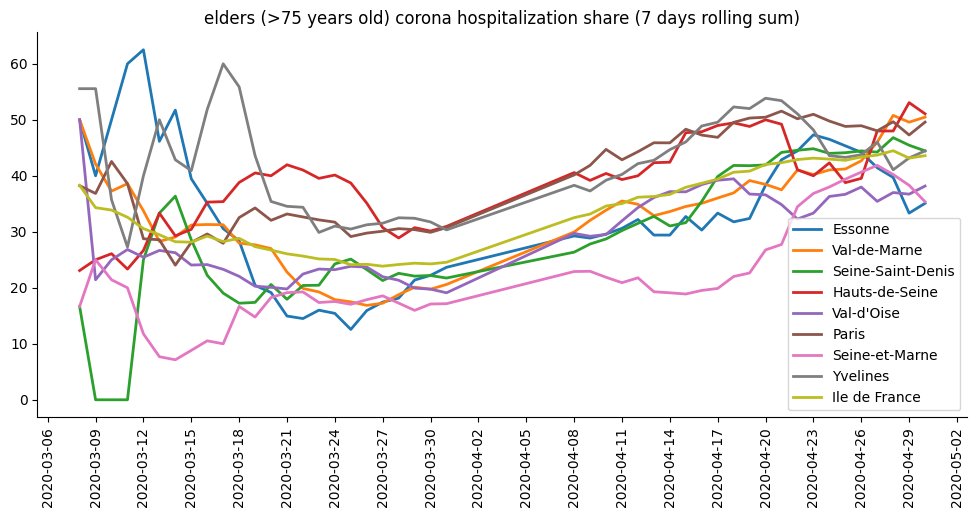

In [0]:
dep_map_idf = {
    'Essonne':['91'],
    'Val-de-Marne':['94'],
    'Seine-Saint-Denis':['93'],
    'Hauts-de-Seine':['92'],
    "Val-d'Oise":['95'],
    'Paris':['75'],
    'Seine-et-Marne':['77'],
    'Yvelines':['78'],
    'Ile de France':['75', '77', '78', '91', '92', '93', '94', '95'],
}
plot_hosp_share_France(data_by_age, dep_map_idf, figsize = (12, 5), plot_date_interval=3)

When looking at the subregions of Ile de France, one can see that three of them did better than the others: Paris, Yvelines and Hauts-de-Seine, which are the three richest subregions of Ile de France.

## **Some French media reports about elders and covid 19**

*“Would a circular from the Ministry of Health have led to a worsening of the epidemic's toll for older patients? This is the question that some professionals ask lip service. Dated March 19, the document suggested severely limiting the admission of the most vulnerable to intensive care. Motivated by the concern of many doctors to avoid excessive treatment and unnecessary suffering, as well as the fear of running out of beds for younger patients, this advice seems to have been applied a little too systematically ...
A "dashboard" of the Paris Public Assistance feeds suspicion. On March 21 - just after the circular was released - 19% of patients in intensive care were over 75 years old. On April 5, at the height of the epidemic, they were only 7%!
[...] For the over 80s, the evolution is even more striking: in two weeks, the rate went from 9 to 2%! At the same time, the epidemic exploded in these high age groups: the octogenarians represent more than half of the total deaths ...”*

Le Canard enchaîné, n°5189 on 22/04/2020 (Google translation)

Please note that the following videos can be subtitled with Google translation in you langage

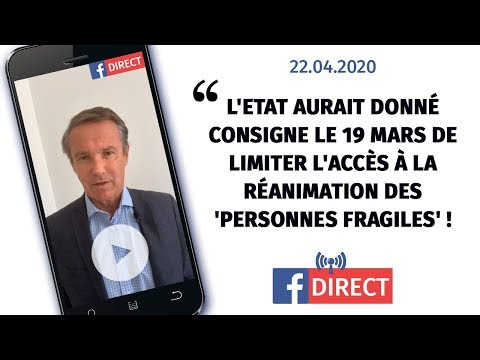

In [0]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('g68hNicLAXA')

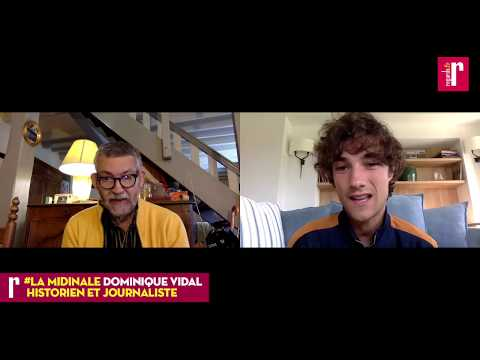

In [0]:
YouTubeVideo('9bmppYwtrS0')